___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***) and **Deep Learning algorithms**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning and Deep Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Downloads the Punkt tokenizer models, which are essential for tokenization in NLTK.
nltk.download("punkt")

# Downloads a list of common stop words used in text processing to improve analysis accuracy.
nltk.download('stopwords')

# Downloads the WordNet lexical database, a key resource for various linguistic tasks in NLTK.
nltk.download('wordnet')

# Downloads the Open Multilingual Wordnet (OMW) version 1.4, extending WordNet to multiple languages.
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MyLab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MyLab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MyLab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MyLab\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()
# Drops the column named "Unnamed: 0" from the DataFrame .

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [6]:
df.shape

(23486, 10)

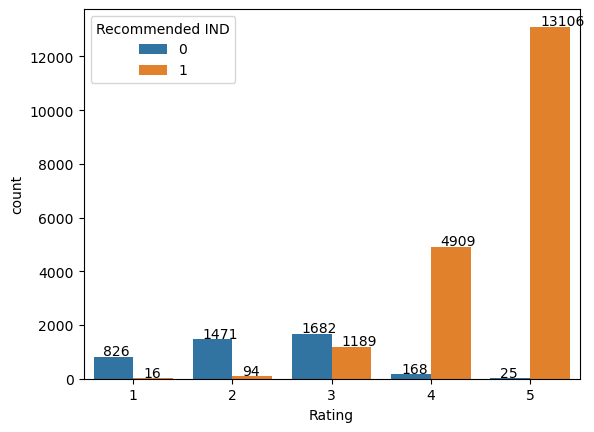

In [7]:

ax = sns.countplot(x="Rating", data=df, hue="Recommended IND")

# Annotate the count values on top of the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 50))

# Show the plot
plt.show()

In [8]:
df["Recommended IND"].unique()

array([1, 0], dtype=int64)

In [9]:
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]

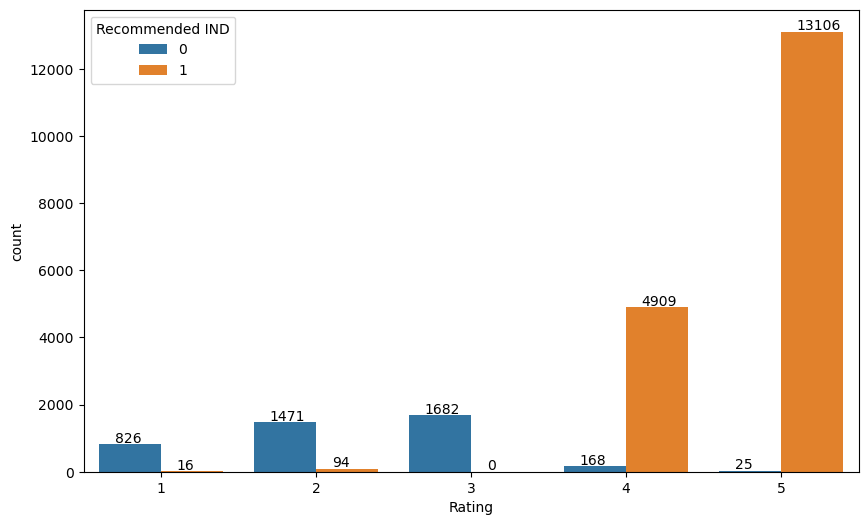

In [10]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

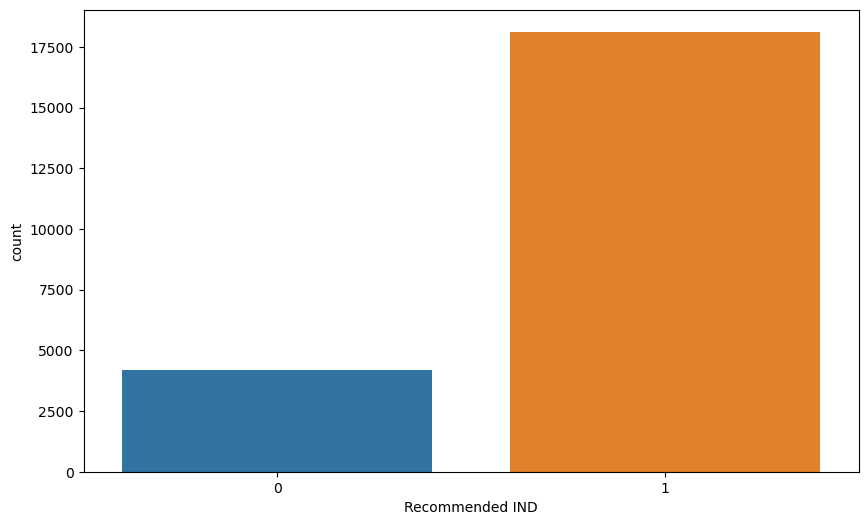

In [11]:

plt.fig = plt.figure(figsize = (10,6))
sns.countplot(x="Recommended IND", data=df);

In [12]:
df["Recommended IND"].value_counts()
# Displaying the count of occurrences for each unique value in the "Recommended IND" column.
# 1 represents recommended, and 0 represents not recommended.

1    18125
0     4172
Name: Recommended IND, dtype: int64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [13]:
df.rename(columns={"Review Text":"text", "Recommended IND":"label"}, inplace=True)

In [14]:
df.head()

,Clothing ID,Age,Title,text,Rating,label,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [15]:
df=df[['text','label']]
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


### Missing Value Detection

In [16]:
df.isnull().sum()
# 'text' column has 826 null values.
# there are zero null values in the 'label' column. 

text     826
label      0
dtype: int64

In [17]:
# Drops rows with missing values (NaN) from 'df' in place.
df.dropna(inplace = True)
## Displays the DataFrame after removing rows
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23478,I was surprised at the positive reviews for th...,0
23479,So i wasn't sure about ordering this skirt bec...,1
23481,I was very happy to snag this dress at such a ...,1
23483,"This fit well, but the top was very see throug...",0


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [18]:
stop_words = stopwords.words('english')

In [19]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
    
    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [20]:
df2 = df.copy()

In [21]:
# Applies the 'cleaning' function to the 'text' column of the DataFrame 'df2'.
df2["text"] = df2["text"].apply(cleaning)
#The purpose of cleaning is to prepare the text data for analysis 
# + Cleaning may involve removing these stop words to focus on more meaningful terms.
df2["text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: text, dtype: object

### Rare Words

In [22]:
" ".join(df2["text"]).split()
# Combines all the text in 'text' column of 'df2' into a single string.
# then Splits the combined string into a list of words.

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 's

In [23]:
# Splits the combined string into a list of words and counts the occurrences of each word.
# Creates a Pandas Series containing the counts of each unique word.
rare_words = pd.Series(" ".join(df2["text"]).split()).value_counts()
#Displays the Pandas Series containing
rare_words

dress          10711
fit             9619
size            8805
love            8703
top             7793
               ...  
olsen              1
shirtsleeve        1
awate              1
rejoice            1
platinum           1
Length: 11719, dtype: int64

In [24]:
# Filters the 'rare_words' to include only words with a count less than or equal to 2.
rare_words = rare_words[rare_words <= 2]

In [25]:
rare_words

garbage        2
spokane        2
harper         2
text           2
mega           2
              ..
olsen          1
shirtsleeve    1
awate          1
rejoice        1
platinum       1
Length: 6364, dtype: int64

In [26]:
rare_words.index

Index(['garbage', 'spokane', 'harper', 'text', 'mega', 'minuet', 'utilitarian',
       'rushing', 'swayed', 'moor',
       ...
       'regulr', 'whiplash', 'buxom', 'absence', 'neighboring', 'olsen',
       'shirtsleeve', 'awate', 'rejoice', 'platinum'],
      dtype='object', length=6364)

In [27]:

# The lambda function removes words that are in the 'rare_words' Pandas Series from each text.
df2["text"] = df2["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))

# Displays the first few rows after applying the lambda function.
print(df2["text"].head())


0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: text, dtype: object


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [28]:
positive = df[df["label"] == 1]["text"]
positive

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
6        I aded this in my basket at hte last mintue to...
                               ...                        
23476    These bottoms are very cute but defiantly chee...
23477    I'm so impressed with the beautiful color comb...
23479    So i wasn't sure about ordering this skirt bec...
23481    I was very happy to snag this dress at such a ...
23485    This dress in a lovely platinum is feminine an...
Name: text, Length: 17370, dtype: object

In [29]:
negative = df[df["label"] == 0]["text"]
negative

2        I had such high hopes for this dress and reall...
5        I love tracy reese dresses, but this one is no...
10       Dress runs small esp where the zipper area run...
22       First of all, this is not pullover styling. th...
25       Loved the material, but i didnt really look at...
                               ...                        
23449    I tried these on because the color is really p...
23450    I wanted to love this jacket. so soft and grea...
23460    I purchased this for a very good price and i t...
23478    I was surprised at the positive reviews for th...
23483    This fit well, but the top was very see throug...
Name: text, Length: 4101, dtype: object

### Collect Words (positive and negative separately)

In [30]:
positive_words = " ".join(positive)
positive_words[:1000]

'Absolutely wonderful - silky and sexy and comfortable Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite. I love, love, love this jumpsuit. it\'s fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments! This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!! I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet 

In [31]:
negative_words = " ".join(negative)
negative_words[:1000]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress. Dress run

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [32]:
#!pip install wordcloud


In [33]:
from wordcloud import WordCloud

In [34]:
# Creates a WordCloud object for positive sentiment visualization.
# Sets the background color to white and specifies a maximum of 250 words in the cloud.

wordcloud_positive = WordCloud(background_color="white", max_words=250)


In [35]:
# Generates a word cloud using the positive words provided in the 'positive_words' variable.
wordcloud_positive.generate(positive_words)

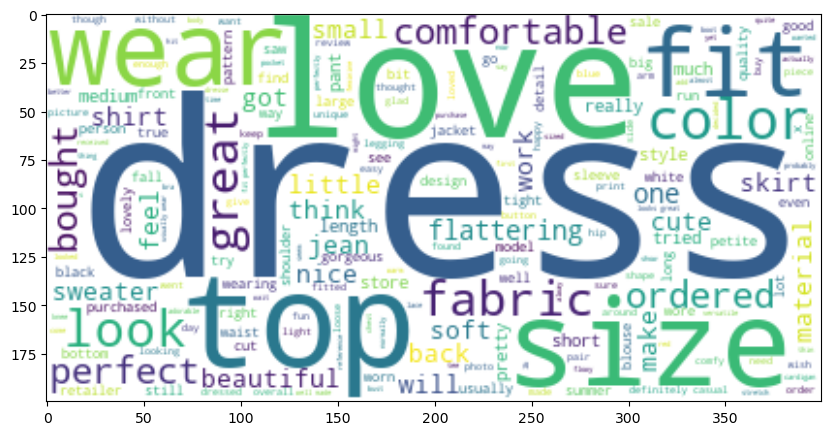

In [36]:
# for creating visualizations.
import matplotlib.pyplot as plt

# Sets the size of the figure to 10x10 inches.
plt.figure(figsize=(10, 10))

# Displays the word cloud image using imshow with bilinear interpolation.
plt.imshow(wordcloud_positive, interpolation="bilinear")

# Removes axis labels for a cleaner visualization.
#plt.axis("off")

# Shows the generated word cloud.
plt.show()


In [37]:
# Creates a WordCloud object for negative sentiment visualization.
# Sets the background color to white, specifies a maximum of 250 words in the cloud, and uses the 'gist_heat' colormap.
wordcloud_negative = WordCloud(background_color="white", max_words=250, colormap='gist_heat')


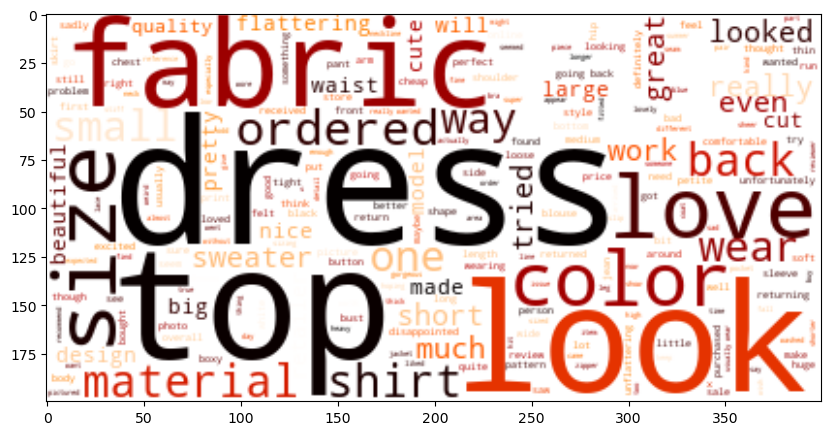

In [38]:

# Generates a word cloud using the negative words provided in the 'negative_words' variable.
wordcloud_negative.generate(negative_words)

# Sets the size of the figure to 10x10 inches.
plt.figure(figsize=(10, 10))

# Displays the word cloud image using imshow with bilinear interpolation.
plt.imshow(wordcloud_negative, interpolation="bilinear")

# Removes axis labels for a cleaner visualization.
#plt.axis("off")

# Shows the generated word cloud for negative sentiment.
plt.show()


## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df2["text"]
y= df2["label"]

In [41]:
y = y.map({0:1, 1:0})

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [45]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
# Creates a DataFrame from the sparse matrix X_train_count, representing the word count features.
# The column names are set using the feature names obtained from the vectorizer.
pd.DataFrame(X_train_count.toarray(), columns=vectorizer.get_feature_names_out())


,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [49]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
# Creates a DataFrame from the sparse matrix X_train_tf_idf, representing the TF-IDF features.
# The column names are set using the feature names obtained from the tf-idf vectorizer.
pd.DataFrame(X_train_tf_idf.toarray(), columns=tf_idf_vectorizer.get_feature_names_out())


,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Eval functions

In [51]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [52]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [53]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
## Fits the Logistic Regression model to the training data
log.fit(X_train_count,y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [54]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)
# it is high accuracy and performs well in terms of precision, recall, and F1-score for both classes. 

LOG MODEL
[[3122  353]
 [ 157  663]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3475
           1       0.65      0.81      0.72       820

    accuracy                           0.88      4295
   macro avg       0.80      0.85      0.82      4295
weighted avg       0.89      0.88      0.89      4295

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     13895
           1       0.78      0.96      0.86      3281

    accuracy                           0.94     17176
   macro avg       0.88      0.95      0.91     17176
weighted avg       0.95      0.94      0.94     17176



In [55]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_count_rec = scores
    elif i == "f1-1":
        log_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8890883671671969

 precision-0          score for count : 0.9562920154442901

 recall-0             score for count : 0.9042822070637226

 f1-0                 score for count : 0.9295332262876987

 precision-1          score for count : 0.6706748914521807

 recall-1             score for count : 0.8247525761731781

 f1-1                 score for count : 0.739551507207182



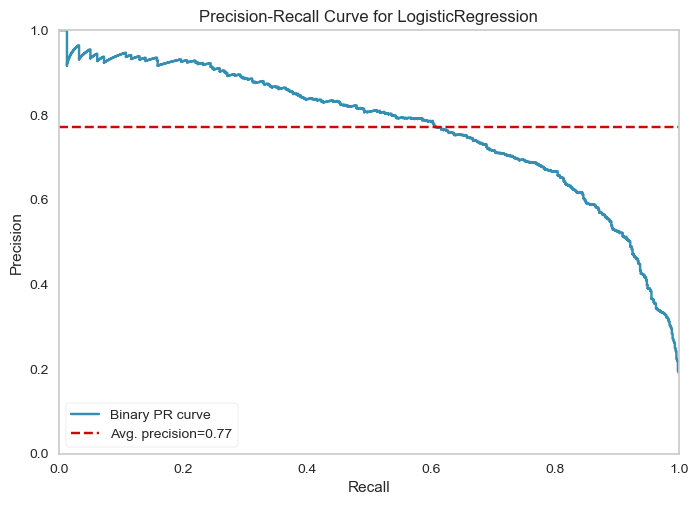

In [56]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

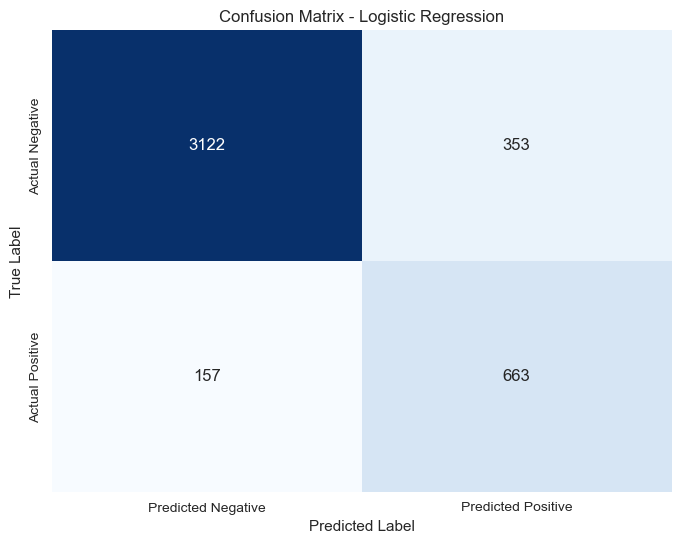

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = log.predict(X_test_count)

# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [58]:
# Retrieves the Area Under the Precision-Recall Curve (AUC-PR) score from viz'.
log_AP_count = viz.score_

### TF-IDF

In [59]:
log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [60]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)
#strong performance in classifying sentiment. With an accuracy of 86% on the test set, 
#the model shows a balanced trade-off between precision and recall for both positive and negative 

LOG MODEL
[[3003  472]
 [ 114  706]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3475
           1       0.60      0.86      0.71       820

    accuracy                           0.86      4295
   macro avg       0.78      0.86      0.81      4295
weighted avg       0.89      0.86      0.87      4295

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     13895
           1       0.62      0.90      0.74      3281

    accuracy                           0.88     17176
   macro avg       0.80      0.88      0.83     17176
weighted avg       0.91      0.88      0.88     17176



In [61]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8821605556433203

 precision-0          score for tfidf : 0.9664961324942005

 recall-0             score for tfidf : 0.885066426340569

 f1-0                 score for tfidf : 0.9239629383089477

 precision-1          score for tfidf : 0.6413675413793383

 recall-1             score for tfidf : 0.8698680406256949

 f1-1                 score for tfidf : 0.7381657801904014



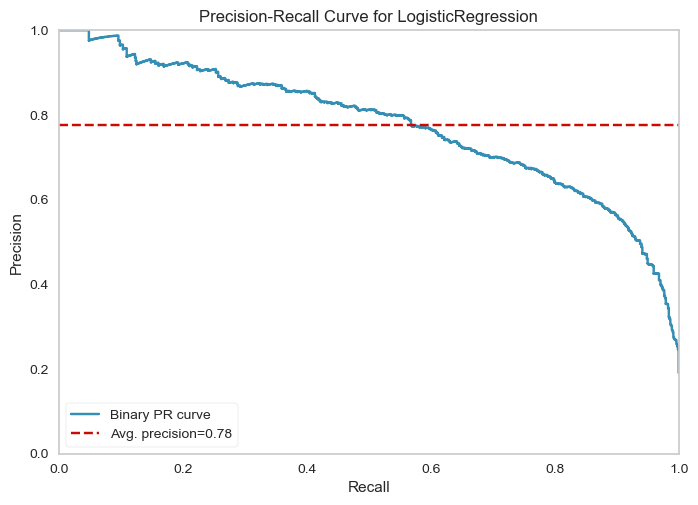

In [62]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced"),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

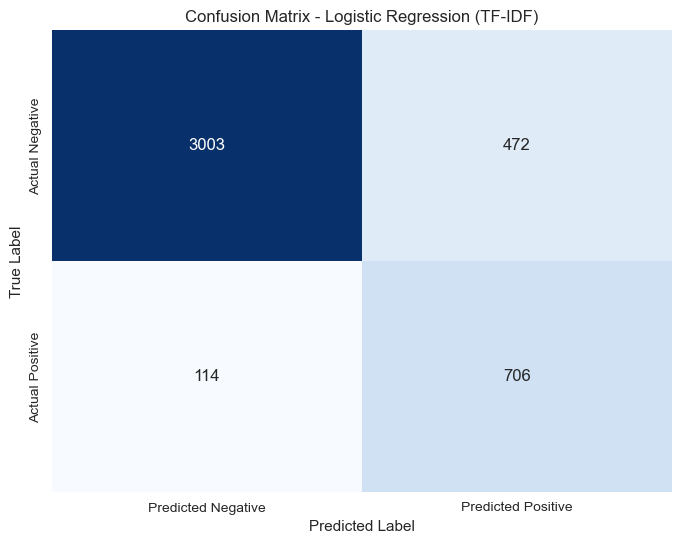

In [63]:
# Predictions on the test set
y_pred = log.predict(X_test_tf_idf)

# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression (TF-IDF)')
plt.show()

In [64]:
# Retrieves the Area Under(AUC-PR) score from 'viz' object for the TF-IDF model.
log_AP_tfidf = viz.score_

## Naive Bayes 

### Countvectorizer

In [65]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_count,y_train)

MultinomialNB()

In [66]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)
# Naive Bayes: 89% test accuracy, balanced precision and recall for positive and negative sentiments, 
# effective in sentiment analysis.

NB MODEL
[[3195  280]
 [ 183  637]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3475
           1       0.69      0.78      0.73       820

    accuracy                           0.89      4295
   macro avg       0.82      0.85      0.83      4295
weighted avg       0.90      0.89      0.89      4295

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13895
           1       0.76      0.84      0.80      3281

    accuracy                           0.92     17176
   macro avg       0.86      0.89      0.87     17176
weighted avg       0.92      0.92      0.92     17176



In [67]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_count_rec = scores
    elif i == "f1-1":
        nb_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.899218931685677

 precision-0          score for count : 0.9490057293245078

 recall-0             score for count : 0.9251518353351876

 f1-0                 score for count : 0.9369125167689614

 precision-1          score for count : 0.7138280067444844

 recall-1             score for count : 0.789398769367633

 f1-1                 score for count : 0.749551918590552



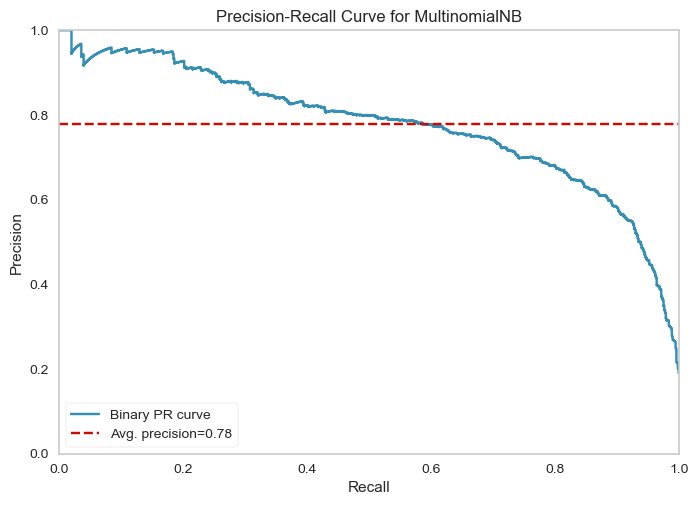

In [68]:
viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

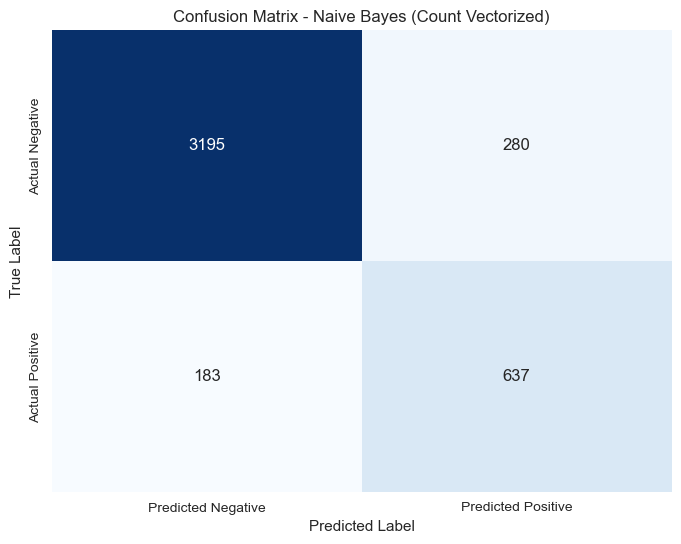

In [69]:

# Predictions on the test set
y_pred = nb.predict(X_test_count)

# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes (Count Vectorized)')
plt.show()

In [70]:
nb_AP_count = viz.score_

### TF-IDF

In [71]:
nb = BernoulliNB()
nb.fit(X_train_tf_idf,y_train)

BernoulliNB()

In [72]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)
#88% test accuracy, balanced precision and recall for sentiment analysis.

NB MODEL
[[3173  302]
 [ 203  617]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3475
           1       0.67      0.75      0.71       820

    accuracy                           0.88      4295
   macro avg       0.81      0.83      0.82      4295
weighted avg       0.89      0.88      0.88      4295

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13895
           1       0.75      0.82      0.78      3281

    accuracy                           0.91     17176
   macro avg       0.85      0.88      0.86     17176
weighted avg       0.92      0.91      0.91     17176



In [73]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_tfidf_rec = scores
    elif i == "f1-1":
        nb_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8917087767805748

 precision-0          score for tfidf : 0.9421229461452889

 recall-0             score for tfidf : 0.9228486411734543

 f1-0                 score for tfidf : 0.932374051119527

 precision-1          score for tfidf : 0.6995378723245316

 recall-1             score for tfidf : 0.7598348654459189

 f1-1                 score for tfidf : 0.7283002544141733



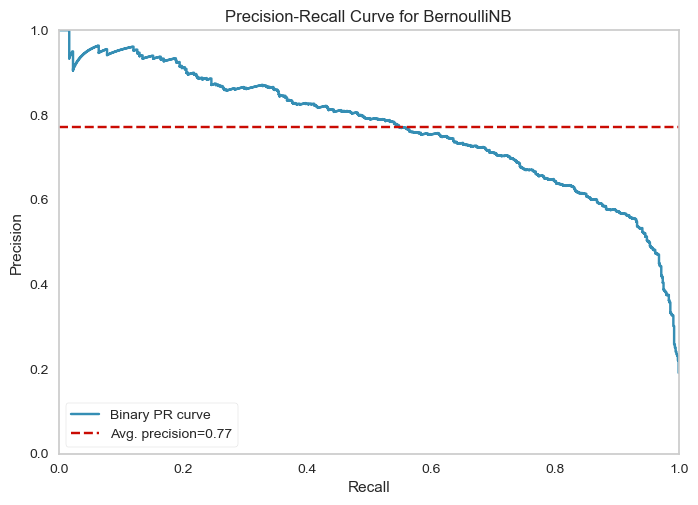

In [74]:
viz = PrecisionRecallCurve(
    BernoulliNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

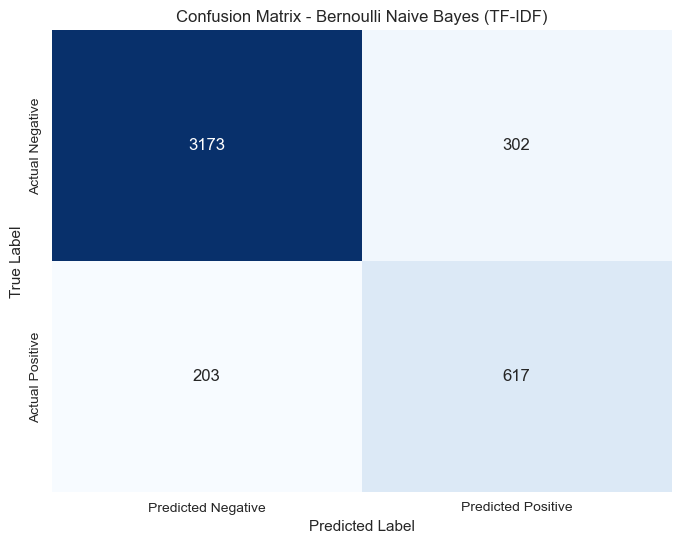

In [75]:

# Predictions on the test set
y_pred = nb.predict(X_test_tf_idf)

# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Bernoulli Naive Bayes (TF-IDF)')
plt.show()

In [76]:
nb_AP_tfidf = viz.score_

## Support Vector Machine (SVM)

### Countvectorizer

In [77]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [78]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)
#87% test accuracy, balanced precision and recall for sentiment analysis.

SVC MODEL
[[3079  396]
 [ 144  676]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3475
           1       0.63      0.82      0.71       820

    accuracy                           0.87      4295
   macro avg       0.79      0.86      0.82      4295
weighted avg       0.89      0.87      0.88      4295

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.91      0.95     13895
           1       0.71      0.93      0.81      3281

    accuracy                           0.91     17176
   macro avg       0.85      0.92      0.88     17176
weighted avg       0.93      0.91      0.92     17176



In [79]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8852460127886376

 precision-0          score for count : 0.9626440664343662

 recall-0             score for count : 0.8928388002341107

 f1-0                 score for count : 0.9263962009467429

 precision-1          score for count : 0.6531251818533468

 recall-1             score for count : 0.8531006746237674

 f1-1                 score for count : 0.7396097688709296



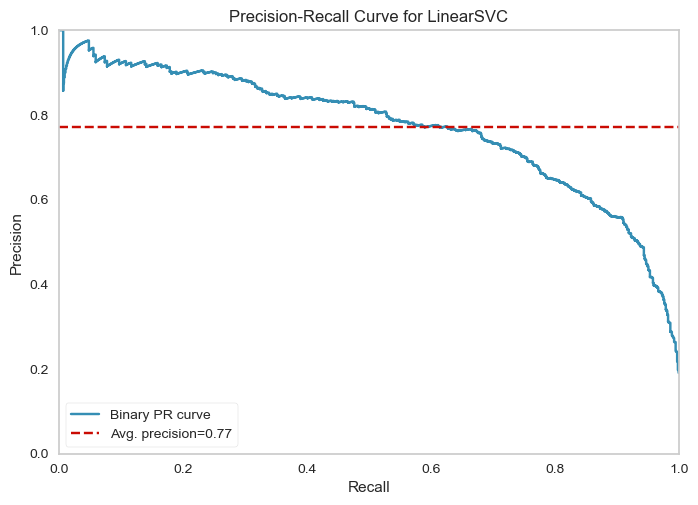

In [80]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

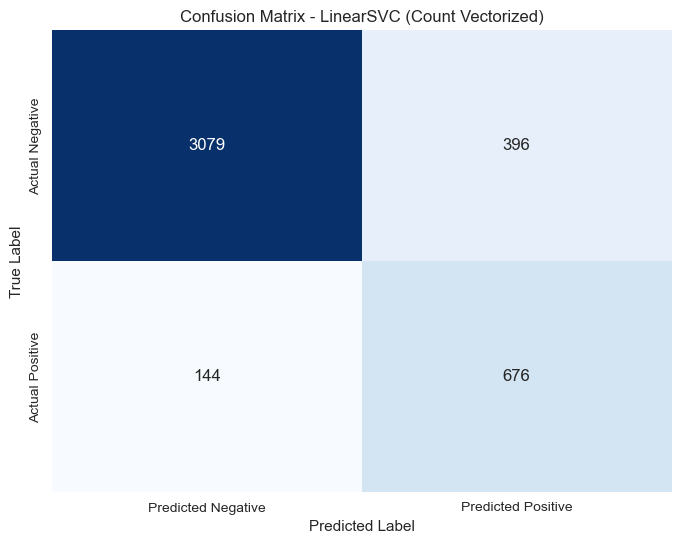

In [81]:
# Predictions on the test set
y_pred = svc.predict(X_test_count)

# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LinearSVC (Count Vectorized)')
plt.show()


In [82]:
svc_AP_count = viz.score_

### TD-IDF

In [83]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [84]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)
#chieving 86% test accuracy, the model shows a balanced trade-off between precision and recall for sentiment analysis

SVC MODEL
[[2995  480]
 [ 110  710]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3475
           1       0.60      0.87      0.71       820

    accuracy                           0.86      4295
   macro avg       0.78      0.86      0.81      4295
weighted avg       0.89      0.86      0.87      4295

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     13895
           1       0.62      0.90      0.73      3281

    accuracy                           0.88     17176
   macro avg       0.80      0.88      0.83     17176
weighted avg       0.91      0.88      0.88     17176



In [85]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_tfidf_rec = scores
    elif i == "f1-1":
        svc_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8642283255237801

 precision-0          score for tfidf : 0.9659072134501292

 recall-0             score for tfidf : 0.8626837795422411

 f1-0                 score for tfidf : 0.9113504416922691

 precision-1          score for tfidf : 0.5996335194700426

 recall-1             score for tfidf : 0.8707836014530358

 f1-1                 score for tfidf : 0.7100458549852414



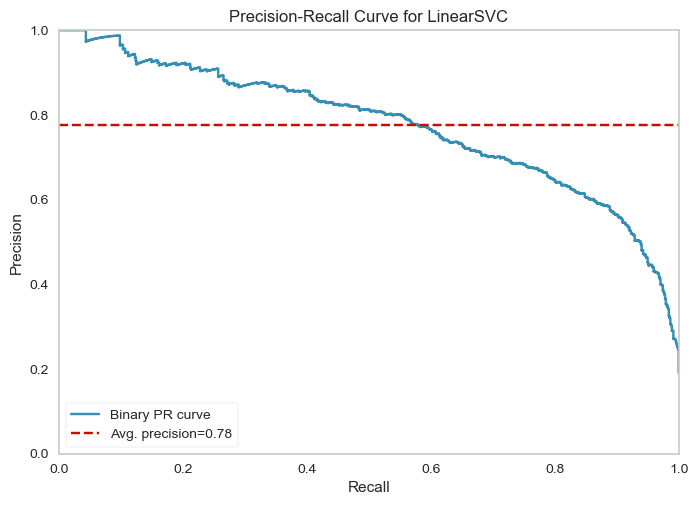

In [86]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

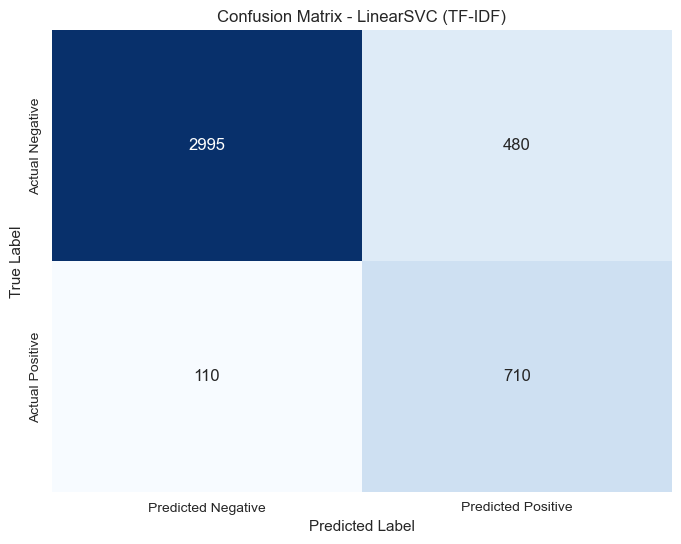

In [87]:

# Predictions on the test set
y_pred = svc.predict(X_test_tf_idf)

# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LinearSVC (TF-IDF)')
plt.show()

In [88]:
svc_AP_tfidf = viz.score_

## Random Forest

### Countvectorizer

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [90]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)
#Achieving 85% test accuracy, the model showcases a balanced trade-off between precision and recall for sentiment analysis

RF MODEL
[[3040  435]
 [ 178  642]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      3475
           1       0.60      0.78      0.68       820

    accuracy                           0.86      4295
   macro avg       0.77      0.83      0.79      4295
weighted avg       0.88      0.86      0.86      4295

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.90      0.94     13895
           1       0.69      0.89      0.78      3281

    accuracy                           0.90     17176
   macro avg       0.83      0.90      0.86     17176
weighted avg       0.92      0.90      0.91     17176



In [91]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8687119763130186

 precision-0          score for count : 0.9483613690083181

 recall-0             score for count : 0.8860027658218999

 f1-0                 score for count : 0.9161015367439772

 precision-1          score for count : 0.6223401681563641

 recall-1             score for count : 0.7954898435762473

 f1-1                 score for count : 0.6981911082232739



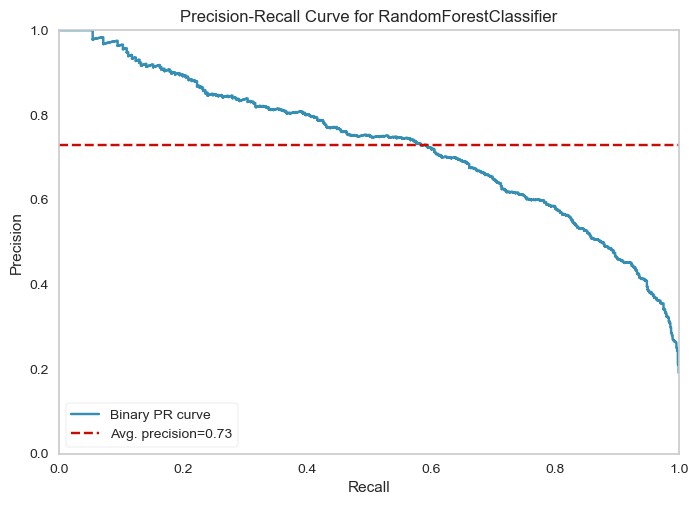

In [92]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

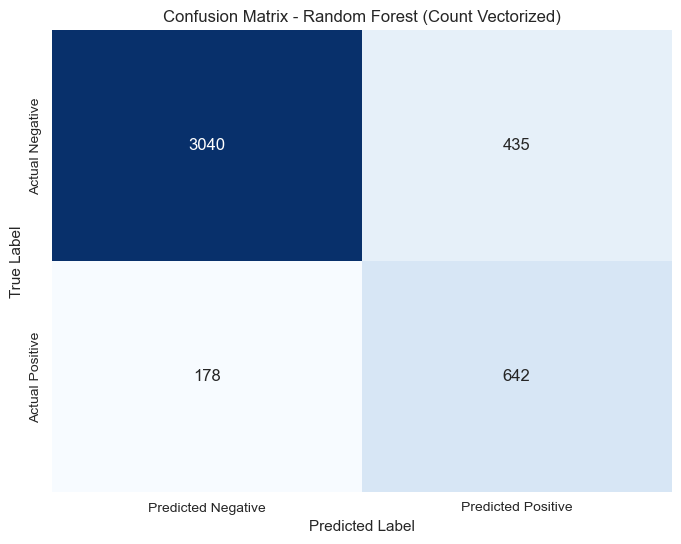

In [93]:

# Predictions on the test set
y_pred = rf.predict(X_test_count)

# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest (Count Vectorized)')
plt.show()


In [94]:
rf_AP_count = viz.score_

### TF-IDF

In [95]:
rf = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [96]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)
#Achieving 84% test accuracy, 
#the model demonstrates a balanced trade-off between precision and recall for sentiment analysis

RF MODEL
[[2985  490]
 [ 169  651]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3475
           1       0.57      0.79      0.66       820

    accuracy                           0.85      4295
   macro avg       0.76      0.83      0.78      4295
weighted avg       0.87      0.85      0.86      4295

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     13895
           1       0.66      0.89      0.75      3281

    accuracy                           0.89     17176
   macro avg       0.81      0.89      0.84     17176
weighted avg       0.91      0.89      0.90     17176



In [97]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_tfidf_rec = scores
    elif i == "f1-1":
        rf_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8535160617342292

 precision-0          score for tfidf : 0.9471836732116772

 recall-0             score for tfidf : 0.8673628354335969

 f1-0                 score for tfidf : 0.9054928794184194

 precision-1          score for tfidf : 0.5858146731072585

 recall-1             score for tfidf : 0.7948736007116909

 f1-1                 score for tfidf : 0.6743697097514776



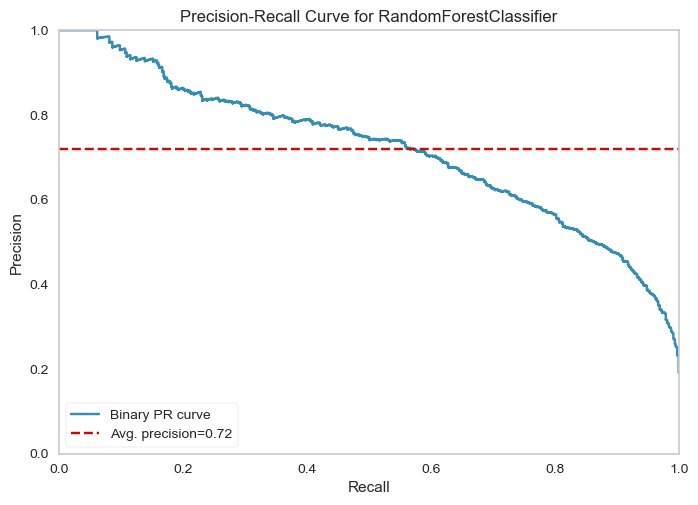

In [98]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

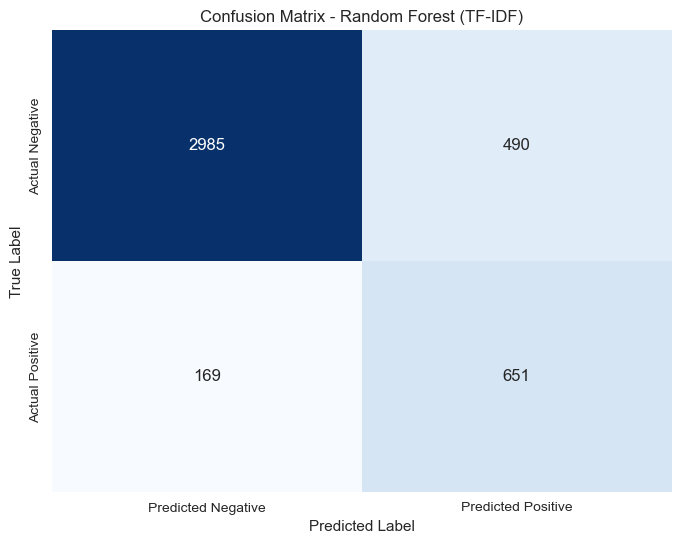

In [99]:
# Predictions on the test set
y_pred = rf.predict(X_test_tf_idf)

# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest (TF-IDF)')
plt.show()


In [100]:
rf_AP_tfidf = viz.score_

## Ada Boosting

### Countvectorizer

In [101]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [102]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)
# Achieving 89% test accuracy, the model demonstrates strong precision and recall for sentiment analysis, 
# showcasing effective performance on both the test and training sets.

Ada MODEL
[[3304  171]
 [ 321  499]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3475
           1       0.74      0.61      0.67       820

    accuracy                           0.89      4295
   macro avg       0.83      0.78      0.80      4295
weighted avg       0.88      0.89      0.88      4295

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     13895
           1       0.84      0.72      0.78      3281

    accuracy                           0.92     17176
   macro avg       0.89      0.85      0.87     17176
weighted avg       0.92      0.92      0.92     17176



In [103]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model =AdaBoostClassifier(n_estimators= 500, random_state = 42)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_count_rec = scores
    elif i == "f1-1":
        ada_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8909516761441261

 precision-0          score for count : 0.918440193498834

 recall-0             score for count : 0.9495502690719994

 f1-0                 score for count : 0.9337271830375382

 precision-1          score for count : 0.7506101422617403

 recall-1             score for count : 0.6427959819111869

 f1-1                 score for count : 0.6923575676225184



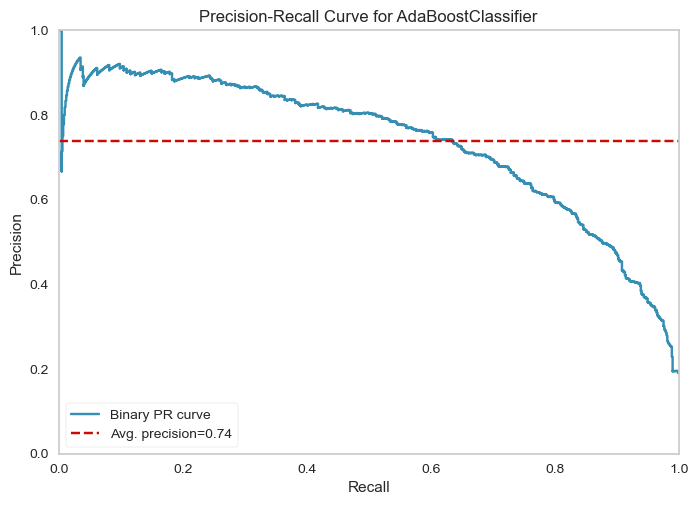

In [104]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

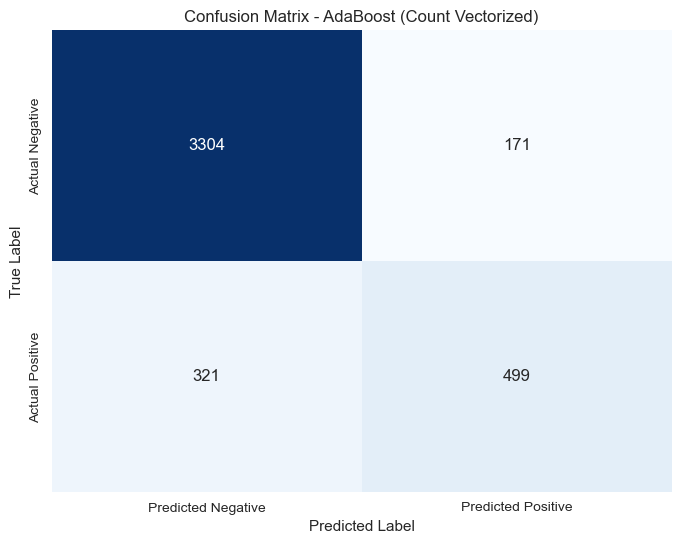

In [105]:
# Predictions on the test set
y_pred = ada.predict(X_test_count)

# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - AdaBoost (Count Vectorized)')
plt.show()

In [106]:
ada_AP_count = viz.score_

### TF-IDF

In [107]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [108]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3255  220]
 [ 317  503]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3475
           1       0.70      0.61      0.65       820

    accuracy                           0.87      4295
   macro avg       0.80      0.78      0.79      4295
weighted avg       0.87      0.87      0.87      4295

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     13895
           1       0.86      0.77      0.82      3281

    accuracy                           0.93     17176
   macro avg       0.91      0.87      0.89     17176
weighted avg       0.93      0.93      0.93     17176



In [109]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model =AdaBoostClassifier(n_estimators= 500, random_state = 42)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_tfidf_rec = scores
    elif i == "f1-1":
        ada_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8854204310385156

 precision-0          score for tfidf : 0.9166796910741709

 recall-0             score for tfidf : 0.9442247152601894

 f1-0                 score for tfidf : 0.930233509680517

 precision-1          score for tfidf : 0.7295416600331297

 recall-1             score for tfidf : 0.6363916895247981

 f1-1                 score for tfidf : 0.6795206916969422



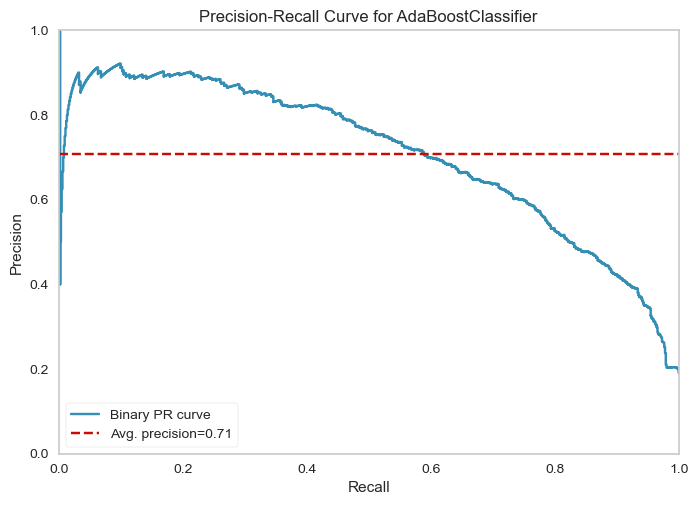

In [110]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

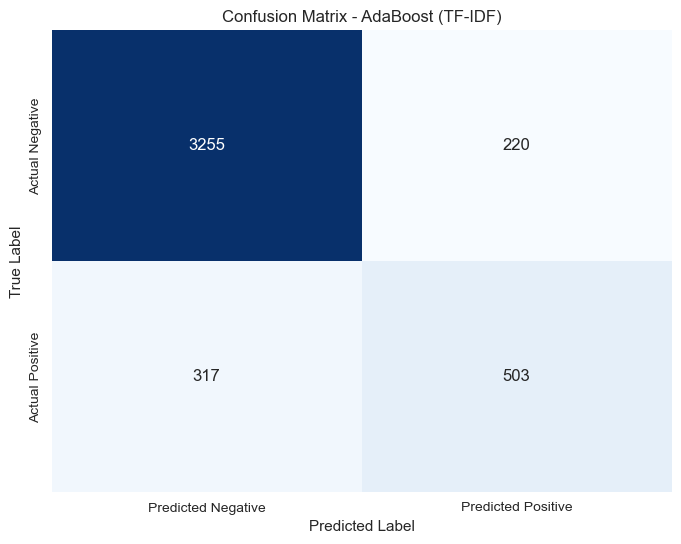

In [111]:
# Predictions on the test set
y_pred = ada.predict(X_test_tf_idf)

# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - AdaBoost (TF-IDF)')
plt.show()


In [112]:
ada_AP_tfidf = viz.score_

## DL modeling

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [114]:
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Tokenization

In [115]:
X = df['text'].values
y = df['label'].map({0:1, 1:0}).values

In [116]:
num_words = 10000 
#We will take the top 15,000 most frequently used words (tokens) in the corpus and ignore the rest.
#If a 'None' value is assigned, all words will be considered.
tokenizer = Tokenizer(num_words=num_words) #filters

In [117]:
tokenizer.fit_on_texts(X)

### Creating word index

In [118]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 'or': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'if': 52,
 'little': 53,
 'ordered': 54,
 'these': 55,
 'one': 56,
 'will': 57,
 'flattering': 58,
 'well': 59,
 'soft': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'back': 64,
 'comfortable': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'all': 75,
 'looks': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


In [119]:
len(tokenizer.word_index)

14483

### Converting tokens to numeric

In [120]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [121]:
X[100]

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [122]:
print(X_num_tokens[100])

[1, 80, 6, 474, 30, 5, 6, 391, 2, 24, 1, 1897, 484, 47, 3, 21, 5, 2, 239, 2154, 199, 189, 550, 14, 90, 3, 865, 313, 4, 278, 109, 5, 74, 126, 8, 22, 30, 2, 240, 31, 4, 46, 9, 75, 102, 150, 5, 6, 1, 2876, 78, 149, 9, 1, 203, 2, 43, 319, 7, 25, 4, 264, 264]


In [123]:
len(X_num_tokens[100])

63

In [124]:
len(X_num_tokens[150])

30

In [125]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

### Maximum number of tokens for all documents¶

In [126]:
num_tokens.mean()

60.08271622188067

In [127]:
num_tokens.max()

116

In [128]:
num_tokens.argmax()

15417

In [129]:
X[15417]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [130]:
max_tokens = 106

In [131]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9853756229332589

### Fixing token counts of all documents (pad_sequences)

In [132]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [133]:
X_pad.shape

(21471, 106)

In [134]:
np.array(X_num_tokens[500])

array([  21,    1,  256,    3,    1,  119,    5,  557,    2,  556, 1992,
         14, 1614,  221,   66,    2,   24,    4,  354,  198,   10,    7,
         56,  128,  190,   32,   48,  871,    2,  139,    7,   14,    1,
        703,  148,    2,  506,   24, 1129,  316,  160,   12,    5])

In [135]:
X_pad[500]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,   21,    1,  256,
          3,    1,  119,    5,  557,    2,  556, 1992,   14, 1614,  221,
         66,    2,   24,    4,  354,  198,   10,    7,   56,  128,  190,
         32,   48,  871,    2,  139,    7,   14,    1,  703,  148,    2,
        506,   24, 1129,  316,  160,   12,    5])

In [136]:
np.array(X_num_tokens[15417])

array([   2,   21,  764,  221,    2,   21,    1,   83,    3,  144,   13,
          7,  479,   77,    2,  191,    1,  439,  221,   20,  360,   62,
          2,  521,    8,   17,  483,  106,    8,  181,   56,   11,   37,
        107,    4,   81,    9,    4,   25,  422,    9,    4,  244,   61,
        416,   41,  115,   67,    4,   81,    8,  181,   15,    2,  104,
          5,    9,    1,  120,  765,    2,  117,  805,  113,    1,   25,
         11,    5,  162,   28,    2,   16, 1624,  523,  164,   13,    1,
         25,    2, 4014, 1773,    1,   22,    3,    5,   16,    4,   81,
         33,    4, 1378,    1,   25,    6,   51,   71,   52,   40,   27,
          1,  516,   78,  673,   36,  592,  145,   42,    4,   22,   36,
        265,   52,   40,   27,  107,    4])

In [137]:
X_pad[15417]

array([  13,    7,  479,   77,    2,  191,    1,  439,  221,   20,  360,
         62,    2,  521,    8,   17,  483,  106,    8,  181,   56,   11,
         37,  107,    4,   81,    9,    4,   25,  422,    9,    4,  244,
         61,  416,   41,  115,   67,    4,   81,    8,  181,   15,    2,
        104,    5,    9,    1,  120,  765,    2,  117,  805,  113,    1,
         25,   11,    5,  162,   28,    2,   16, 1624,  523,  164,   13,
          1,   25,    2, 4014, 1773,    1,   22,    3,    5,   16,    4,
         81,   33,    4, 1378,    1,   25,    6,   51,   71,   52,   40,
         27,    1,  516,   78,  673,   36,  592,  145,   42,    4,   22,
         36,  265,   52,   40,   27,  107,    4])

### Train Set Split

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
from keras.layers import Bidirectional

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=42)

### Modeling

In [141]:
model = Sequential()

In [142]:
embedding_size = 100

In [143]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [144]:
model.add(Bidirectional(GRU(units=48, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units=48, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units=48)))
model.add(Dense(1, activation='sigmoid'))

In [145]:
optimizer = Adam(lr=0.004)

In [146]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [147]:
model.summary() 
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (48*48 + 48*48  +2*48)*3 ==> m =  48, n = 48
# (48*48 + 48*48  +2*48)*3 ==> m =  48, n = 48

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding  (None, 106, 100)          1000000   
 )                                                               
                                                                 
 bidirectional (Bidirection  (None, 106, 96)           43200     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 106, 96)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 106, 96)           42048     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 106, 96)           0         
                                                        

In [148]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 3, restore_best_weights=True)

In [149]:
pd.Series(y_train).value_counts(normalize=True)

0    0.808984
1    0.191016
dtype: float64

In [150]:
weights = {0:19, 1:81}

In [151]:
model.fit(X_train, y_train, epochs=25, batch_size=128, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
151/151 [==============================] - 185s 1s/step - loss: 14.1007 - recall: 0.7816 - val_loss: 0.3654 - val_recall: 0.9024
Epoch 2/25
151/151 [==============================] - 131s 865ms/step - loss: 7.2774 - recall: 0.9250 - val_loss: 0.2904 - val_recall: 0.8439
Epoch 3/25
151/151 [==============================] - 134s 886ms/step - loss: 5.3194 - recall: 0.9567 - val_loss: 0.3076 - val_recall: 0.7878
Epoch 4/25
151/151 [==============================] - 134s 886ms/step - loss: 4.3381 - recall: 0.9721 - val_loss: 0.3235 - val_recall: 0.7659
Epoch 5/25
151/151 [==============================] - 132s 876ms/step - loss: 3.9782 - recall: 0.9716 - val_loss: 0.3390 - val_recall: 0.8000
Epoch 5: early stopping


### Model evaluation

In [152]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,14.100712,0.781631,0.365375,0.902439
1,7.277407,0.924953,0.290351,0.843902
2,5.319397,0.956651,0.307592,0.787805
3,4.338121,0.972094,0.323453,0.765854
4,3.978165,0.971552,0.339023,0.800000


<Axes: >

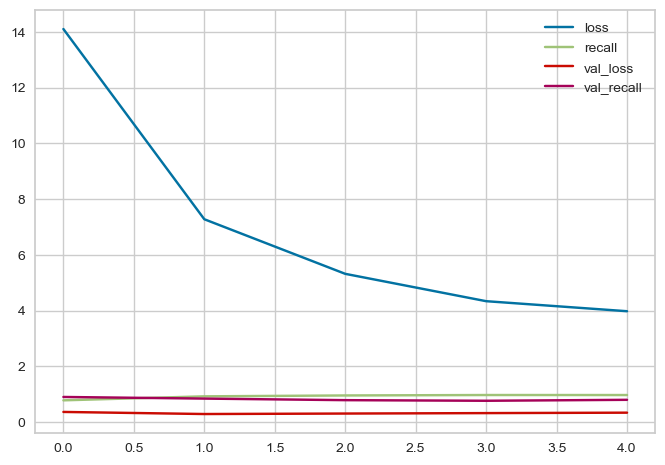

In [153]:
model_loss.plot()

In [154]:
model.evaluate(X_train, y_train)

604/604 [==============================] - 40s 66ms/step - loss: 0.1898 - recall: 0.9786


[0.18975301086902618, 0.978596568107605]

In [155]:
model.evaluate(X_test, y_test)

68/68 [==============================] - 5s 69ms/step - loss: 0.2904 - recall: 0.8439


[0.2903514802455902, 0.8439024686813354]

In [156]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

604/604 [==============================] - 42s 62ms/step
[[14478  1154]
 [   79  3612]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     15632
           1       0.76      0.98      0.85      3691

    accuracy                           0.94     19323
   macro avg       0.88      0.95      0.91     19323
weighted avg       0.95      0.94      0.94     19323



In [157]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

68/68 [==============================] - 4s 63ms/step
[[1535  203]
 [  64  346]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1738
           1       0.63      0.84      0.72       410

    accuracy                           0.88      2148
   macro avg       0.80      0.86      0.82      2148
weighted avg       0.90      0.88      0.88      2148



In [158]:
from sklearn.metrics import precision_recall_curve, average_precision_score

68/68 [==============================] - 4s 56ms/step


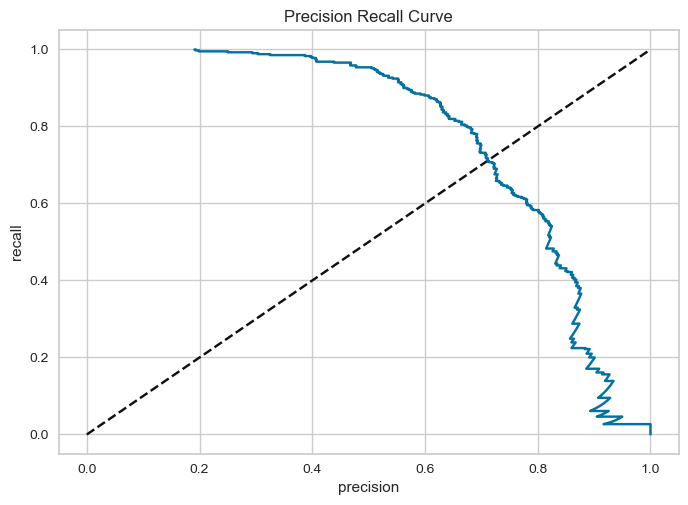

In [159]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [160]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

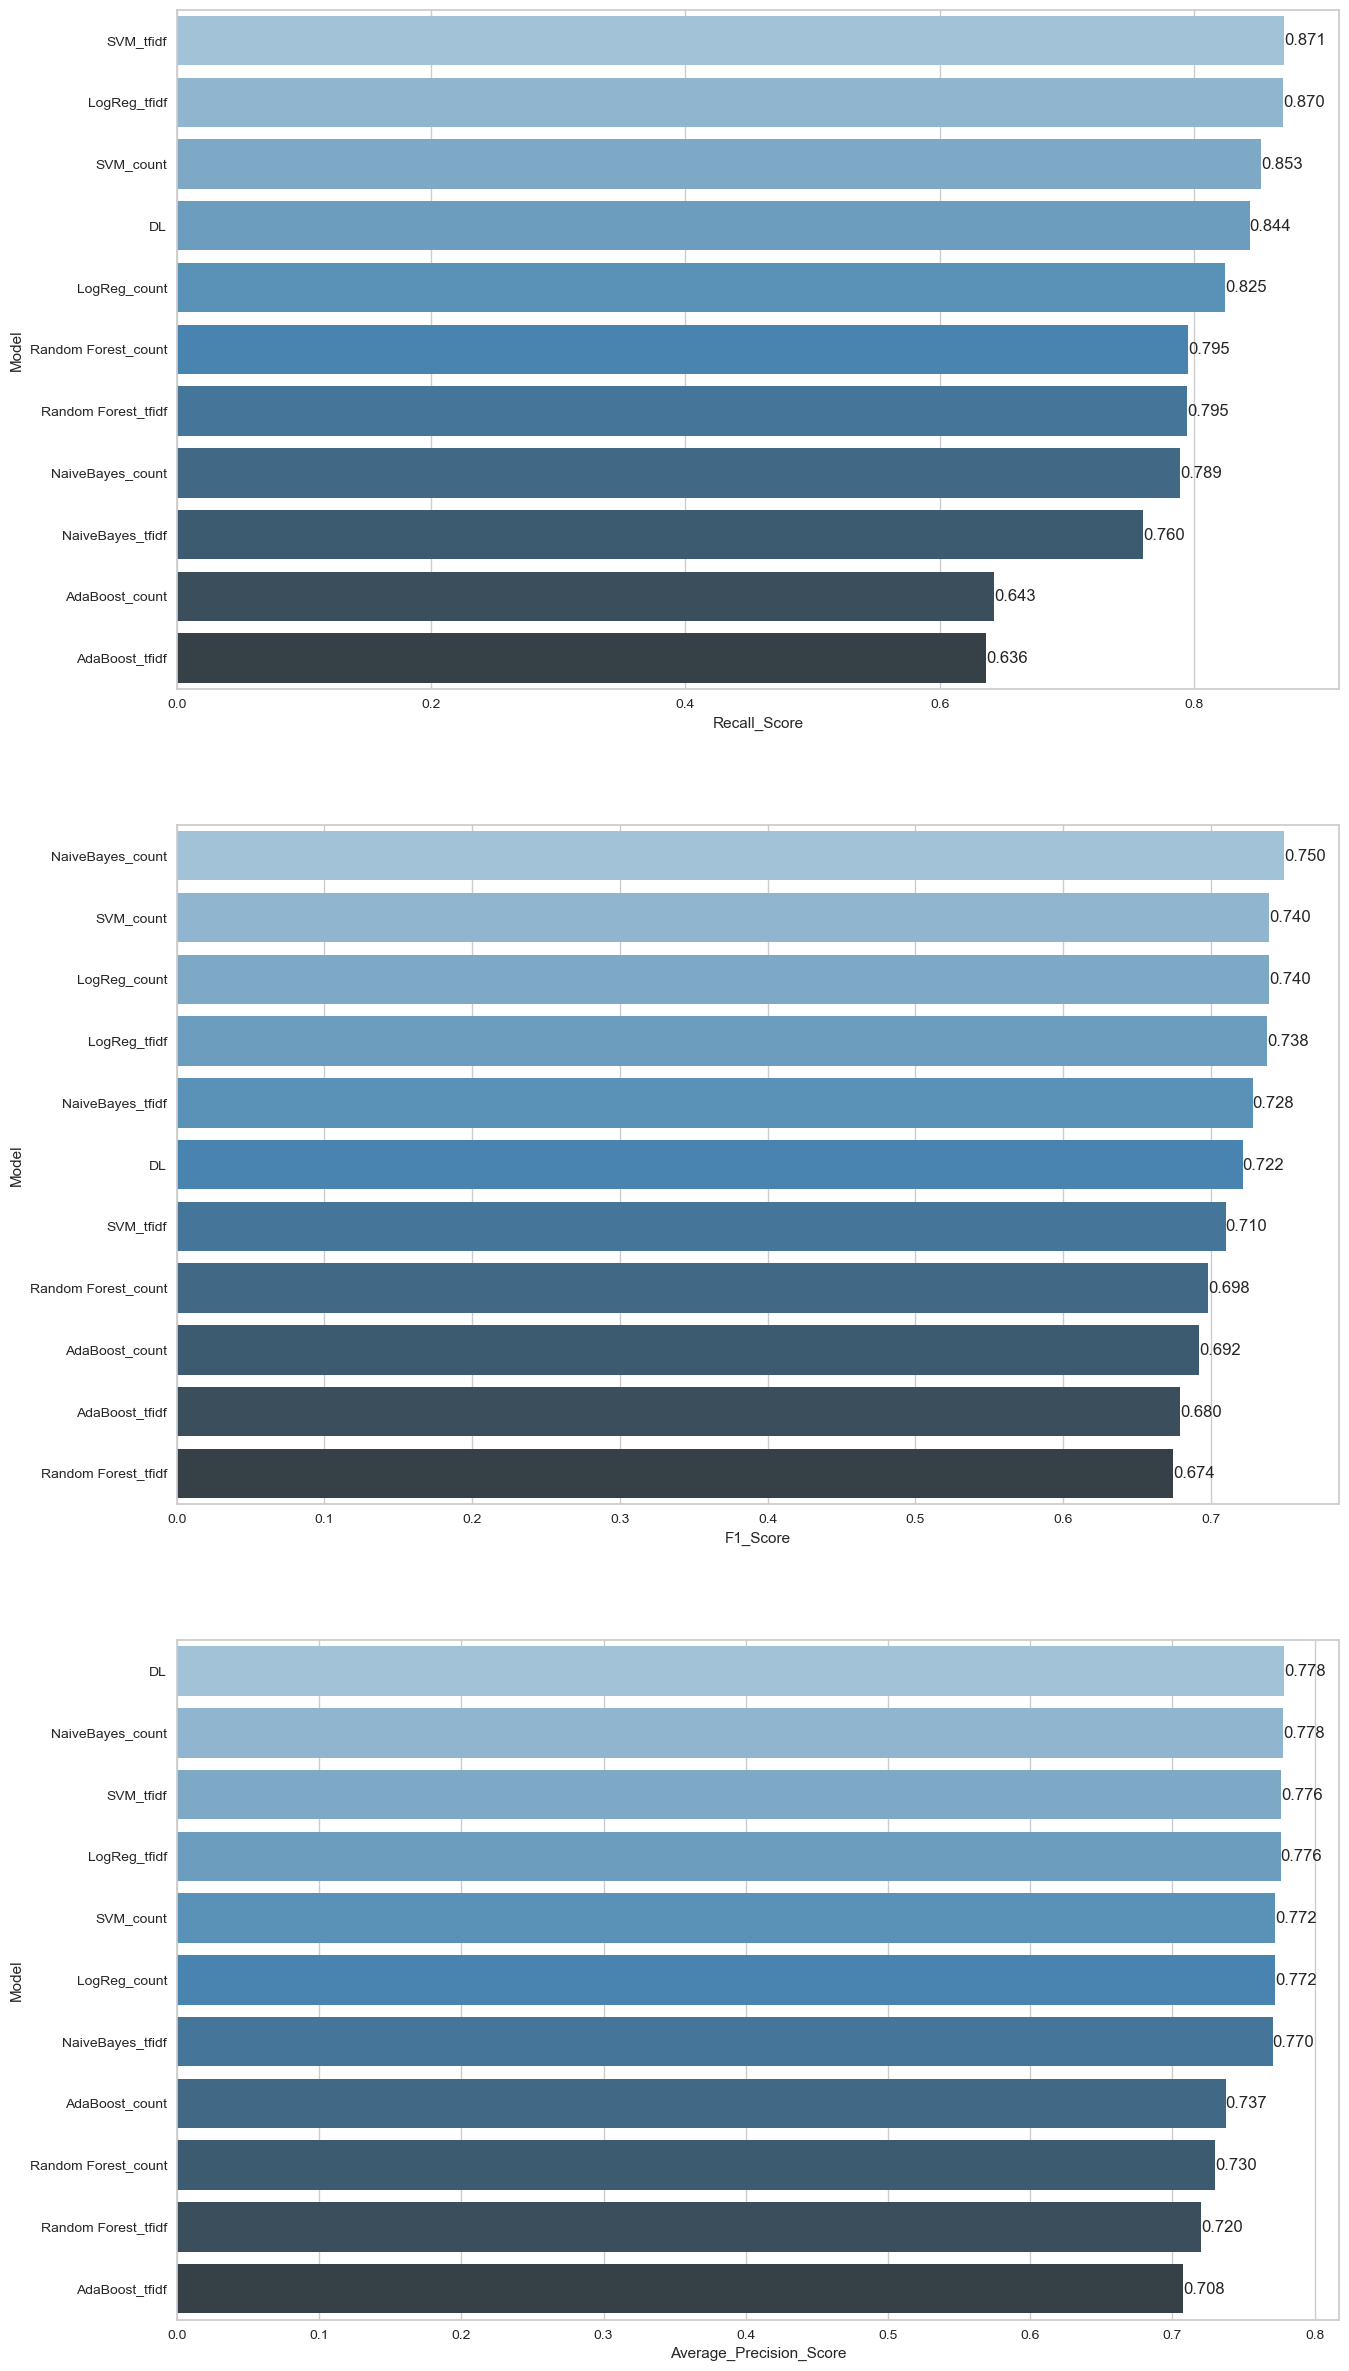

In [161]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___